In [2]:
import boto3

In [3]:
import pandas as pd
from io import StringIO

In [4]:
# Set up S3 client
client = boto3.client('s3')

In [5]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_7d_05_05_2023/' # Folder under analysis

In [6]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [7]:
# Initialize an empty list 
dfs = []

In [8]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_7d_05_05_2023/forecast_7d_05_05_2023_2024-01-16T14-16-27Z_part0.csv
Forecast/Forecast_analysis/forecast_7d_05_05_2023/forecast_7d_05_05_2023_2024-01-16T14-16-27Z_part1.csv
Forecast/Forecast_analysis/forecast_7d_05_05_2023/forecast_7d_05_05_2023_2024-01-16T14-16-27Z_part2.csv
Forecast/Forecast_analysis/forecast_7d_05_05_2023/forecast_7d_05_05_2023_2024-01-16T14-16-27Z_part3.csv


In [9]:
final_df = pd.concat(dfs, ignore_index=True)

In [10]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  819 non-null    int64  
 1   country  819 non-null    object 
 2   payer    819 non-null    object 
 3   date     819 non-null    object 
 4   p10      819 non-null    float64
 5   p50      819 non-null    float64
 6   p90      819 non-null    float64
 7   mean     819 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 51.3+ KB


In [12]:
final_df['item_id'].nunique()

117

In [13]:
final_df.payer.unique()

array(['elektra (mexico)', 'argenper', 'davivienda', 'afro internacional',
       'bancoppel (appriza)', 'ficohsa', 'caribe express',
       'bbva - bancomer (bts)', 'merchantrade',
       'banco de credito del peru - bcp (ut)', 'banco bisa',
       'banorte (ut)', 'mastercard atm network', 'zeepay',
       'empenos del sur (anterior balsas)', 'transferto - thunes',
       'banco agricola', 'banco davivienda salvadoreno (bts)', 'kori',
       'farmacias del ahorro (datransfer)', 'transpay', 'elektra (bts)',
       'soriana', 'nafa', 'transfer directo', 'nairagram', 'bantrab (ut)',
       'credomatic', 'm. lhuillier', 'cooperativa cacil (ut)',
       'tigo money', 'lafise', 'viamericas usa deposits', 'speed money',
       'fedecaces (el salvador)', 'girosmex', 'chedraui (appriza)',
       'banco del austro', 'banco de guayaquil',
       'banco popular honduras (ut)', 'banco de oro (bdo)', 'banpro',
       'banco daycoval', 'cebuana lhuillier', 'yes bank', 'banhcafe',
       'banco atlan

In [14]:
final_df.head(10)

,item_id,country,payer,date,p10,p50,p90,mean
0,52,mexico,elektra (mexico),2023-05-06,8.741092e+06,1.026435e+07,1.178762e+07,1.026435e+07
1,52,mexico,elektra (mexico),2023-05-07,7.648060e+06,9.015764e+06,1.038347e+07,9.015764e+06
2,52,mexico,elektra (mexico),2023-05-08,6.572627e+06,7.777625e+06,8.982623e+06,7.777625e+06
3,52,mexico,elektra (mexico),2023-05-09,5.260605e+06,6.248470e+06,7.236335e+06,6.248470e+06
4,52,mexico,elektra (mexico),2023-05-10,4.879696e+06,5.817491e+06,6.755286e+06,5.817491e+06
5,52,mexico,elektra (mexico),2023-05-11,4.975236e+06,5.953028e+06,6.930821e+06,5.953028e+06
6,52,mexico,elektra (mexico),2023-05-12,7.655797e+06,9.193348e+06,1.073090e+07,9.193348e+06
7,7,chile,argenper,2023-05-06,8.145853e+01,1.156429e+03,2.231400e+03,1.156429e+03
8,7,chile,argenper,2023-05-07,-4.442345e+01,1.031901e+03,2.108226e+03,1.031901e+03
9,7,chile,argenper,2023-05-08,1.745966e+02,1.252273e+03,2.329950e+03,1.252273e+03


In [15]:
final_df.country.unique()

array(['mexico', 'chile', 'colombia', 'guinea', 'honduras',
       'dominican republic', 'india', 'peru', 'bolivia',
       'united states (atm & deposits)', "cote d'ivoire (ivory coast)",
       'portugal', 'el salvador', 'burkina faso', 'malaysia', 'benin',
       'senegal', 'gambia, the', 'nigeria', 'guatemala', 'cameroon',
       'philippines', 'sierra leone', 'thailand', 'nicaragua',
       'united states', 'ecuador', 'bangladesh', 'brazil', 'ghana',
       'haiti', 'indonesia', 'spain', 'argentina', 'belgium', 'nepal',
       'france', 'italy', 'costa rica', 'uruguay', 'togo'], dtype=object)

In [16]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [17]:
final_df['payer_country'].nunique()

117

In [18]:
final_df.country.nunique()

41

In [19]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [20]:
##TOP 10 FORECAST AMOUNTS BETWEEN 11/09/2023 AND 17/09/2023##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico              5.427008e+07
bancoppel (appriza)_mexico           3.348329e+07
banrural (ryt)_guatemala             2.858869e+07
banco industrial_guatemala           2.115613e+07
envios con clabe (appriza)_mexico    6.412957e+06
bbva - bancomer (bts)_mexico         5.212808e+06
banco de occidente_honduras          4.158269e+06
banorte (ut)_mexico                  3.949004e+06
metrobank_philippines                3.591437e+06
banco atlantida_honduras             3.510156e+06
Name: mean, dtype: float64


In [21]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-12 00:00:00'))

In [31]:
final_df.loc[final_df.payer_country=='envios con clabe (appriza)_mexico']

,item_id,country,payer,date,p10,p50,p90,mean,payer_country
469,55,mexico,envios con clabe (appriza),2023-05-06,947879.905495,1.125023e+06,1.302167e+06,1.125023e+06,envios con clabe (appriza)_mexico
470,55,mexico,envios con clabe (appriza),2023-05-07,786076.333393,9.355586e+05,1.085041e+06,9.355586e+05,envios con clabe (appriza)_mexico
471,55,mexico,envios con clabe (appriza),2023-05-08,792593.275576,9.458915e+05,1.099190e+06,9.458915e+05,envios con clabe (appriza)_mexico
472,55,mexico,envios con clabe (appriza),2023-05-09,649100.975328,7.767389e+05,9.043769e+05,7.767389e+05,envios con clabe (appriza)_mexico
473,55,mexico,envios con clabe (appriza),2023-05-10,602225.650627,7.225729e+05,8.429201e+05,7.225729e+05,envios con clabe (appriza)_mexico
474,55,mexico,envios con clabe (appriza),2023-05-11,628292.148623,7.558435e+05,8.833948e+05,7.558435e+05,envios con clabe (appriza)_mexico
475,55,mexico,envios con clabe (appriza),2023-05-12,954535.975396,1.151328e+06,1.348120e+06,1.151328e+06,envios con clabe (appriza)_mexico


In [258]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO                 5.027782e+07
BANCOPPEL (APPRIZA)_MEXICO              2.878941e+07
BANRURAL (RYT)_GUATEMALA                2.572086e+07
BANCO INDUSTRIAL_GUATEMALA              1.943539e+07
ENVIOS CON CLABE (APPRIZA)_MEXICO       5.539103e+06
BBVA - BANCOMER (BTS)_MEXICO            4.528607e+06
BANCO DE OCCIDENTE_HONDURAS             3.869803e+06
BANORTE (UT)_MEXICO                     3.383742e+06
BANCO ATLANTIDA_HONDURAS                3.312693e+06
TELECOMM TELEGRAFOS (APPRIZA)_MEXICO    3.068002e+06
Name: amount, dtype: float64


In [24]:
final_df['mean'].sum()

221966765.51269704

In [337]:
control=final_df.loc[final_df.country=='mexico']

In [338]:
control['mean'].sum()

116008653.83086106

In [339]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [340]:
from pyathena import connect

In [341]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [342]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_738/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [343]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [344]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
0,TELECOMM TELEGRAFOS (APPRIZA),MEXICO,2023-04-24,977,536661.67,22
1,ELEKTRA (BTS),GUATEMALA,2021-02-27,157,24916.09,121
2,OXXO (TN),MEXICO,2021-10-05,210,15696.39,37
3,TRANSFER DIRECTO,MEXICO,2023-08-12,123,80301.68,2
4,BANCO DE GUAYAQUIL,ECUADOR,2021-12-31,58,15688.22,2


In [345]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101970 entries, 0 to 101969
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   payer         101970 non-null  object        
 1   country       101970 non-null  object        
 2   date          101970 non-null  datetime64[ns]
 3   tx            101970 non-null  int64         
 4   amount        101970 non-null  float64       
 5   coupon_count  101970 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.7+ MB


In [346]:
df_check=df_check.loc[(df_check.date>'2023-05-05') & (df_check.date<'2023-05-13')]

In [347]:
df_check.date.min(),df_check.date.max()

(Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-12 00:00:00'))

In [348]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
244,TRANSFERTO - THUNES,ITALY,2023-05-08,1,500.0,0
433,MASTERCARD ATM NETWORK,UNITED STATES,2023-05-12,14,3400.0,0
500,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-11,3,612.0,0
695,COOPERATIVA FRONTERIZA (UT),HONDURAS,2023-05-11,88,33482.0,2
859,EXPIRED ORDERS,PERU,2023-05-12,0,0.0,0


In [349]:
df_check.country.nunique()

45

In [350]:
df_check.payer.nunique()

97

In [351]:
df_check.amount.sum()

261499288.56599998

In [352]:
control2=df_check.loc[df_check.country=='MEXICO']

In [353]:
control2.amount.sum()

138478798.049

In [354]:
df_check.country.unique()

array(['ITALY', 'UNITED STATES', 'MEXICO', 'HONDURAS', 'PERU', 'GHANA',
       'CHILE', 'SPAIN', 'BELGIUM', 'BRAZIL',
       'UNITED STATES (ATM & DEPOSITS)', 'CAMEROON',
       "COTE D'IVOIRE (IVORY COAST)", 'NIGERIA', 'GUATEMALA',
       'BURKINA FASO', 'NEPAL', 'PHILIPPINES', 'SIERRA LEONE', 'SENEGAL',
       'COLOMBIA', 'ECUADOR', 'EL SALVADOR', 'NICARAGUA', 'TOGO',
       'INDONESIA', 'GUINEA', 'THAILAND', 'INDIA', 'BENIN', 'PORTUGAL',
       'BOLIVIA', 'COSTA RICA', 'GAMBIA, THE', 'ARGENTINA', 'BANGLADESH',
       'DOMINICAN REPUBLIC', 'UNITED KINGDOM', 'HAITI', 'GERMANY', 'CHAD',
       'LIBERIA', 'MALI', 'FRANCE', 'URUGUAY'], dtype=object)

In [355]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [356]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO              6.602237e+07
BANCOPPEL (APPRIZA)_MEXICO           3.941639e+07
BANRURAL (RYT)_GUATEMALA             3.318405e+07
BANCO INDUSTRIAL_GUATEMALA           2.452128e+07
ENVIOS CON CLABE (APPRIZA)_MEXICO    7.195868e+06
BBVA - BANCOMER (BTS)_MEXICO         6.260863e+06
BANCO DE OCCIDENTE_HONDURAS          5.276309e+06
BANCO ATLANTIDA_HONDURAS             4.478456e+06
G Y T CONTINENTAL_GUATEMALA          4.183671e+06
BANORTE (UT)_MEXICO                  4.159130e+06
Name: amount, dtype: float64


In [357]:
final_df.country.unique()

array(['mexico', 'chile', 'colombia', 'guinea', 'honduras',
       'dominican republic', 'india', 'peru', 'bolivia',
       'united states (atm & deposits)', "cote d'ivoire (ivory coast)",
       'portugal', 'el salvador', 'burkina faso', 'malaysia', 'benin',
       'senegal', 'gambia, the', 'nigeria', 'guatemala', 'cameroon',
       'philippines', 'sierra leone', 'thailand', 'nicaragua',
       'united states', 'ecuador', 'bangladesh', 'brazil', 'ghana',
       'haiti', 'indonesia', 'spain', 'argentina', 'belgium', 'nepal',
       'france', 'italy', 'costa rica', 'uruguay', 'togo'], dtype=object)

In [358]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_738/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [359]:
final_df.country.unique()

array(['MEXICO', 'CHILE', 'COLOMBIA', 'GUINEA', 'HONDURAS',
       'DOMINICAN REPUBLIC', 'INDIA', 'PERU', 'BOLIVIA',
       'UNITED STATES (ATM & DEPOSITS)', "COTE D'IVOIRE (IVORY COAST)",
       'PORTUGAL', 'EL SALVADOR', 'BURKINA FASO', 'MALAYSIA', 'BENIN',
       'SENEGAL', 'GAMBIA, THE', 'NIGERIA', 'GUATEMALA', 'CAMEROON',
       'PHILIPPINES', 'SIERRA LEONE', 'THAILAND', 'NICARAGUA',
       'UNITED STATES', 'ECUADOR', 'BANGLADESH', 'BRAZIL', 'GHANA',
       'HAITI', 'INDONESIA', 'SPAIN', 'ARGENTINA', 'BELGIUM', 'NEPAL',
       'FRANCE', 'ITALY', 'COSTA RICA', 'URUGUAY', 'TOGO'], dtype=object)

In [360]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [361]:
df_forecast._merge.value_counts()

_merge
both          685
right_only    134
left_only     116
Name: count, dtype: int64

In [362]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['EXPIRED ORDERS', 'NAFA', 'TRANSFERTO - THUNES', 'TRANSPAY',
       '24XORO', 'CASHWAY', 'MUTHOOT-BANGLADESH', 'TELEDOLAR (TN)',
       'BANCO PICHINCHA (TN)', 'TELEDOLAR-NIC (TN)', 'ARGENPER', 'KORI',
       'BANK OF PHILIPPINE ISLANDS (BPI)', '7 ELEVEN (UT)'], dtype=object)

In [363]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['AFRO INTERNACIONAL', 'MERCHANTRADE', 'MASTERCARD ATM NETWORK',
       'ZEEPAY', 'TRANSFERTO - THUNES', 'KORI', 'TRANSPAY',
       'M. LHUILLIER', 'TIGO MONEY', 'GME', 'TELEDOLAR-NIC',
       'BANSEFI - BANCO DEL BIENESTAR', 'NAFA', 'VTN', 'TELEDOLAR',
       'AFEX', 'BANCO INDUSTRIAL ELS (RED CHAPINA)'], dtype=object)

In [364]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

36734.73031561369

In [365]:
control4.country.unique()

array(['GUINEA', 'INDIA', 'UNITED STATES (ATM & DEPOSITS)',
       "COTE D'IVOIRE (IVORY COAST)", 'PORTUGAL', 'BURKINA FASO',
       'MALAYSIA', 'BENIN', 'SENEGAL', 'CAMEROON', 'PHILIPPINES',
       'THAILAND', 'NIGERIA', 'EL SALVADOR', 'BANGLADESH', 'BELGIUM',
       'NEPAL', 'NICARAGUA', 'FRANCE', 'MEXICO', 'ITALY', 'COSTA RICA',
       'URUGUAY'], dtype=object)

In [366]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['TRANSFERTO - THUNES', 'MASTERCARD ATM NETWORK',
       'ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)',
       'COOPERATIVA FRONTERIZA (UT)', 'ZEEPAY', 'AFEX', 'BANCO DAYCOVAL',
       'VIAMERICAS USA DEPOSITS', 'TRANSPAY', 'VTN', 'BANCO INDUSTRIAL',
       'GME', 'BANTRAB (UT)', 'MICOOPE-FENACOAC (RED CHAPINA)', 'FICOHSA',
       'GIROSMEX', 'TRANSFER DIRECTO', 'MSBB MONEY', 'CEBUANA LHUILLIER',
       'AFRO INTERNACIONAL', 'FARMACIAS DEL AHORRO (DATRANSFER)',
       'ARGENPER', 'BANCO DE CREDITO DEL PERU - BCP (UT)',
       'GRUPO EXITO (TN)', 'BANCO DE OCCIDENTE', 'BANRURAL (RYT)',
       'ECUAGIROS', 'CUSCA (CITI - RECIBA NETWORKS)',
       'BANCO DAVIVIENDA SALVADORENO (BTS)', 'BANORTE (UT)',
       'BANCO DE GUAYAQUIL', 'TELECOMM TELEGRAFOS (APPRIZA)', 'LAFISE',
       'BANCO DEL AUSTRO', 'NAFA', 'BANCO POPULAR HONDURAS (UT)',
       'MERCHANTRADE', 'CHEDRAUI (APPRIZA)', 'YES BANK', 'SPEED MONEY',
       'BANCO GANADERO (BOLIVIA)', 'OXXO (TN)', 'EASY PAGOS',
       'FEDECREDIT

In [367]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(259017997.69600004, 221930030.78238142)

In [368]:
df_forecast.amount.sum()

261499288.56600004

In [369]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
6695,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-09,2,312.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
6789,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-11,1,245.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
15925,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-12,11,5587.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
34541,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-06,5,2695.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
34797,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-10,2,800.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
40042,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-07,6,3010.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
59782,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-08,4,3683.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [370]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
55,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-09,2.0,312.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,557.553920,1638.053331,2718.552742,1638.053331,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
56,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-11,1.0,245.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,-318.111844,771.885439,1861.882722,771.885439,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
137,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-12,11.0,5587.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,577.455753,1680.235732,2783.015710,1680.235732,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
275,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-06,5.0,2695.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,871.634573,1937.728532,3003.822491,1937.728532,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
276,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-10,2.0,800.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,-363.451492,721.807246,1807.065983,721.807246,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
318,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-07,6.0,3010.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,1127.794163,2198.711470,3269.628777,2198.711470,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
501,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-05-08,4.0,3683.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,260.970673,1336.689701,2412.408729,1336.689701,BANCO POPULAR HONDURAS (UT)_HONDURAS,both


In [371]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [372]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [373]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 934
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            819 non-null    object        
 1   country          819 non-null    object        
 2   date             819 non-null    datetime64[ns]
 3   tx               685 non-null    float64       
 4   amount           819 non-null    float64       
 5   coupon_count     685 non-null    float64       
 6   payer_country_x  685 non-null    object        
 7   item_id          819 non-null    float64       
 8   p10              819 non-null    float64       
 9   p50              819 non-null    float64       
 10  p90              819 non-null    float64       
 11  mean             819 non-null    float64       
 12  payer_country_y  819 non-null    object        
 13  _merge           819 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [374]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [375]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 934
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    819 non-null    object        
 1   country  819 non-null    object        
 2   date     819 non-null    datetime64[ns]
 3   amount   819 non-null    float64       
 4   p10      819 non-null    float64       
 5   p50      819 non-null    float64       
 6   p90      819 non-null    float64       
 7   mean     819 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 57.6+ KB


In [376]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [377]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,TRANSFERTO - THUNES,ITALY,2023-05-08,500.00,-206.160479,414.178074,1034.516626,414.178074,TRANSFERTO - THUNES_ITALY
1,MASTERCARD ATM NETWORK,UNITED STATES,2023-05-12,3400.00,1171.998636,2496.813732,3821.628827,2496.813732,MASTERCARD ATM NETWORK_UNITED STATES
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-11,612.00,1582.060610,3237.352241,4892.643872,3237.352241,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
3,COOPERATIVA FRONTERIZA (UT),HONDURAS,2023-05-11,33482.00,13551.337099,23746.636658,33941.936218,23746.636658,COOPERATIVA FRONTERIZA (UT)_HONDURAS
5,ZEEPAY,GHANA,2023-05-09,36493.24,17460.454669,35571.361452,53682.268235,35571.361452,ZEEPAY_GHANA


In [378]:
## MAPE A 1 DÍA POR PAYER##

In [379]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [380]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [381]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(668, 9)

In [382]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,TRANSFERTO - THUNES,ITALY,2023-05-08,500.00,-206.160479,414.178074,1034.516626,414.178074,TRANSFERTO - THUNES_ITALY
1,MASTERCARD ATM NETWORK,UNITED STATES,2023-05-12,3400.00,1171.998636,2496.813732,3821.628827,2496.813732,MASTERCARD ATM NETWORK_UNITED STATES
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-11,612.00,1582.060610,3237.352241,4892.643872,3237.352241,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
3,COOPERATIVA FRONTERIZA (UT),HONDURAS,2023-05-11,33482.00,13551.337099,23746.636658,33941.936218,23746.636658,COOPERATIVA FRONTERIZA (UT)_HONDURAS
5,ZEEPAY,GHANA,2023-05-09,36493.24,17460.454669,35571.361452,53682.268235,35571.361452,ZEEPAY_GHANA


In [383]:
df_forecast_final.date.min()

Timestamp('2023-05-06 00:00:00')

In [384]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control

,payer,country,date,amount,p10,p50,p90,mean,payer_country
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-11,612.00,1582.060610,3237.352241,4892.643872,3237.352241,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
19,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-08,6460.00,1901.547443,3489.743703,5077.939962,3489.743703,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
27,GIROSMEX,MEXICO,2023-05-06,58115.71,39244.197038,43716.015339,48187.833641,43716.015339,GIROSMEX_MEXICO
28,TRANSFER DIRECTO,MEXICO,2023-05-06,92658.20,78287.504809,84036.819737,89786.134664,84036.819737,TRANSFER DIRECTO_MEXICO
30,GIROSMEX,MEXICO,2023-05-10,35121.27,27415.706679,32189.468674,36963.230669,32189.468674,GIROSMEX_MEXICO
...,...,...,...,...,...,...,...,...,...
778,TRANSFER DIRECTO,MEXICO,2023-05-08,127395.34,96581.022870,102676.114310,108771.205751,102676.114310,TRANSFER DIRECTO_MEXICO
779,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-05-11,710981.66,628292.148623,755843.450868,883394.753114,755843.450868,ENVIOS CON CLABE (APPRIZA)_MEXICO
786,CAJA POPULAR MEXICANA (UT),MEXICO,2023-05-11,53667.18,45825.446695,62237.672057,78649.897419,62237.672057,CAJA POPULAR MEXICANA (UT)_MEXICO
788,GIROSMEX,MEXICO,2023-05-11,34552.05,27938.570220,32784.879614,37631.189009,32784.879614,GIROSMEX_MEXICO


In [394]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2023-05-06']

In [395]:
forecast_1d.shape

(94, 9)

In [396]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,TRANSFERTO - THUNES,ITALY,2023-05-08,500.00,-206.160479,414.178074,1034.516626,414.178074,TRANSFERTO - THUNES_ITALY
1,MASTERCARD ATM NETWORK,UNITED STATES,2023-05-12,3400.00,1171.998636,2496.813732,3821.628827,2496.813732,MASTERCARD ATM NETWORK_UNITED STATES
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-05-11,612.00,1582.060610,3237.352241,4892.643872,3237.352241,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
3,COOPERATIVA FRONTERIZA (UT),HONDURAS,2023-05-11,33482.00,13551.337099,23746.636658,33941.936218,23746.636658,COOPERATIVA FRONTERIZA (UT)_HONDURAS
5,ZEEPAY,GHANA,2023-05-09,36493.24,17460.454669,35571.361452,53682.268235,35571.361452,ZEEPAY_GHANA


In [397]:
forecast_1d.head(3)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
12,TRANSPAY,CAMEROON,2023-05-06,221.36,-396.668525,199.237522,795.143569,199.237522,TRANSPAY_CAMEROON
27,GIROSMEX,MEXICO,2023-05-06,58115.71,39244.197038,43716.015339,48187.833641,43716.015339,GIROSMEX_MEXICO
28,TRANSFER DIRECTO,MEXICO,2023-05-06,92658.20,78287.504809,84036.819737,89786.134664,84036.819737,TRANSFER DIRECTO_MEXICO


In [398]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

/tmp/ipykernel_738/2323064100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)


In [399]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.0019879986455578888, 3.4134076046579347)

In [400]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
12,TRANSPAY,CAMEROON,2023-05-06,221.36,-396.668525,199.237522,795.143569,199.237522,TRANSPAY_CAMEROON,0.099939
27,GIROSMEX,MEXICO,2023-05-06,58115.71,39244.197038,43716.015339,48187.833641,43716.015339,GIROSMEX_MEXICO,0.247776


In [401]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
87,ELEKTRA (MEXICO),MEXICO,2023-05-06,11403912.32,8.741092e+06,1.026435e+07,1.178762e+07,1.026435e+07,ELEKTRA (MEXICO)_MEXICO,0.099927
232,BANCOPPEL (APPRIZA),MEXICO,2023-05-06,6872393.84,5.797374e+06,6.361396e+06,6.925417e+06,6.361396e+06,BANCOPPEL (APPRIZA)_MEXICO,0.074355
705,BANRURAL (RYT),GUATEMALA,2023-05-06,5805138.88,4.401653e+06,5.226229e+06,6.050806e+06,5.226229e+06,BANRURAL (RYT)_GUATEMALA,0.099724
483,BANCO INDUSTRIAL,GUATEMALA,2023-05-06,4223628.16,3.120953e+06,3.703785e+06,4.286618e+06,3.703785e+06,BANCO INDUSTRIAL_GUATEMALA,0.123080
764,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-05-06,1193369.24,9.478799e+05,1.125023e+06,1.302167e+06,1.125023e+06,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.057271
366,BBVA - BANCOMER (BTS),MEXICO,2023-05-06,908680.82,7.187617e+05,8.730310e+05,1.027300e+06,8.730310e+05,BBVA - BANCOMER (BTS)_MEXICO,0.039233
495,BANCO ATLANTIDA,HONDURAS,2023-05-06,753120.63,5.111553e+05,5.957243e+05,6.802933e+05,5.957243e+05,BANCO ATLANTIDA_HONDURAS,0.208992
700,BANCO DE OCCIDENTE,HONDURAS,2023-05-06,711084.43,5.139608e+05,6.418339e+05,7.697070e+05,6.418339e+05,BANCO DE OCCIDENTE_HONDURAS,0.097387
339,ELEKTRA (BTS),HONDURAS,2023-05-06,681690.88,4.638380e+05,5.683242e+05,6.728105e+05,5.683242e+05,ELEKTRA (BTS)_HONDURAS,0.166302
793,BANPRO,NICARAGUA,2023-05-06,671312.60,4.675347e+05,6.140096e+05,7.604846e+05,6.140096e+05,BANPRO_NICARAGUA,0.085360


In [402]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.2846345213093704

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


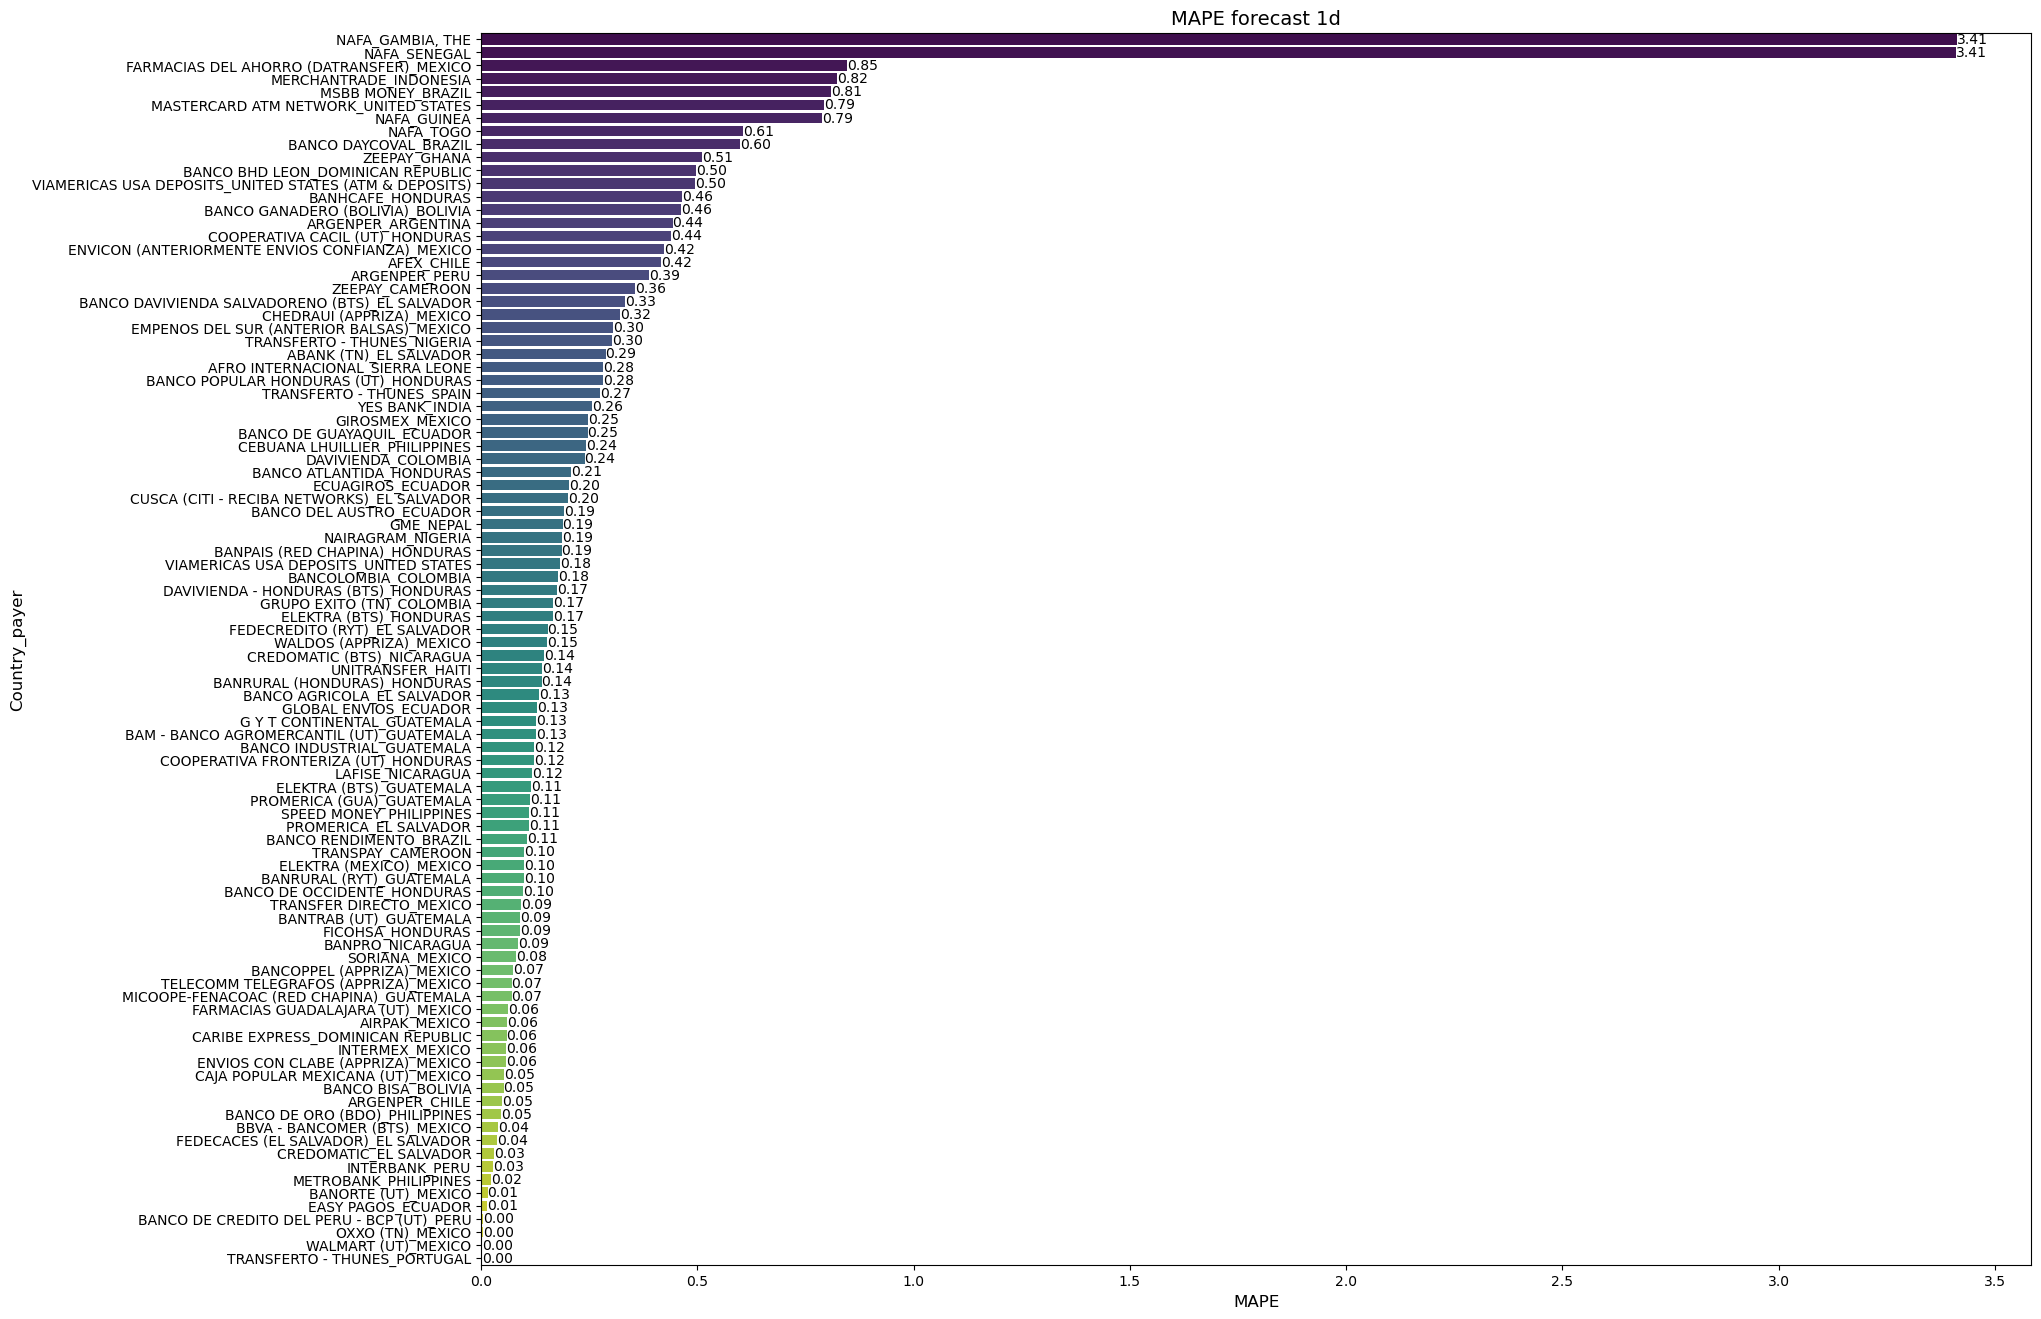

In [403]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [404]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
23,PORTUGAL,0.001988
22,PHILIPPINES,0.105357
11,GUATEMALA,0.108232
19,NICARAGUA,0.115831
21,PERU,0.140240
13,HAITI,0.141094
17,MEXICO,0.153349
7,ECUADOR,0.157152
8,EL SALVADOR,0.160859
18,NEPAL,0.188317


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


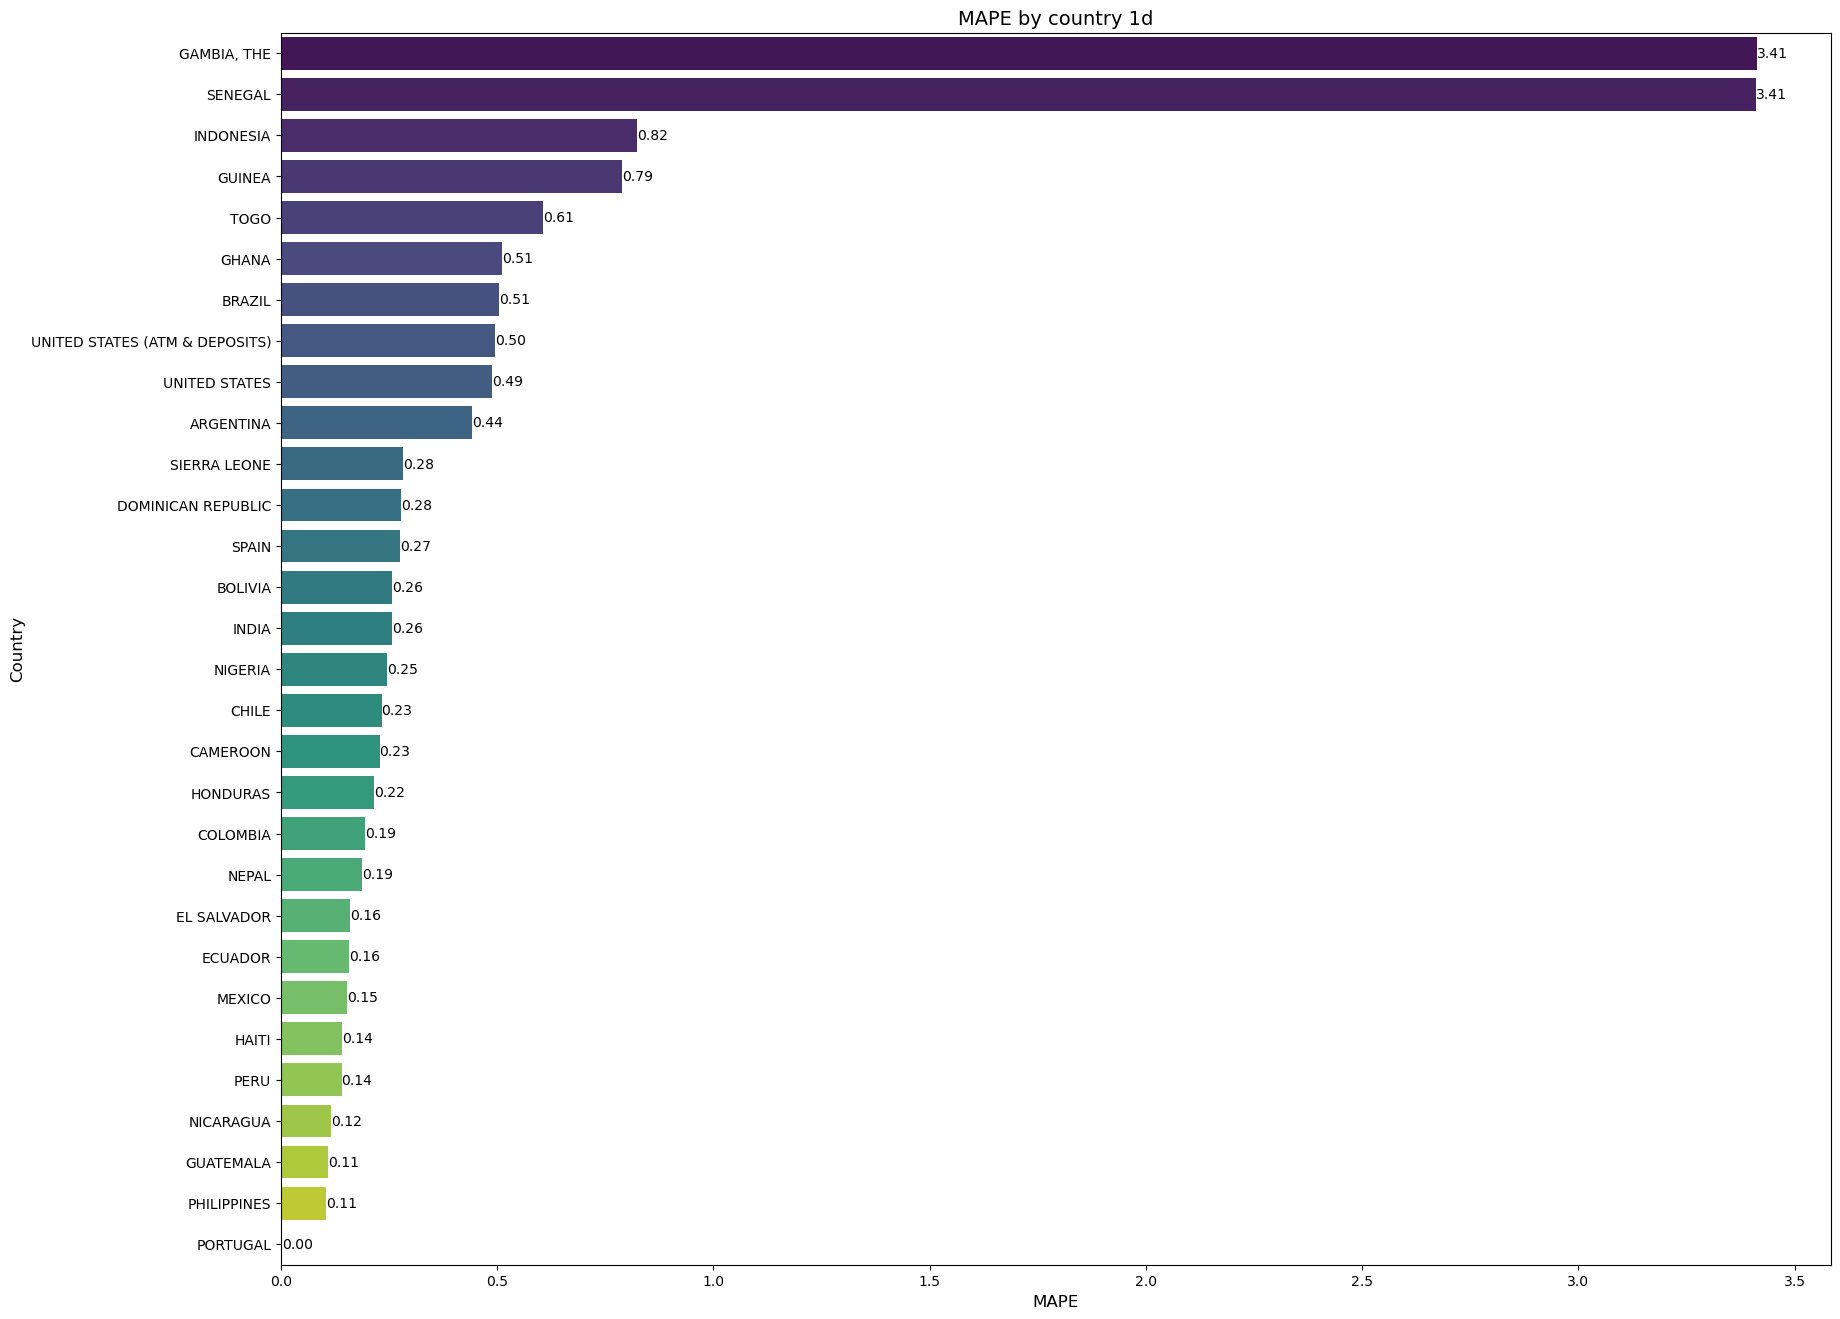

In [405]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [406]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.10496965779161468


In [ ]:
##WAPE POR PAÍSES##

In [407]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


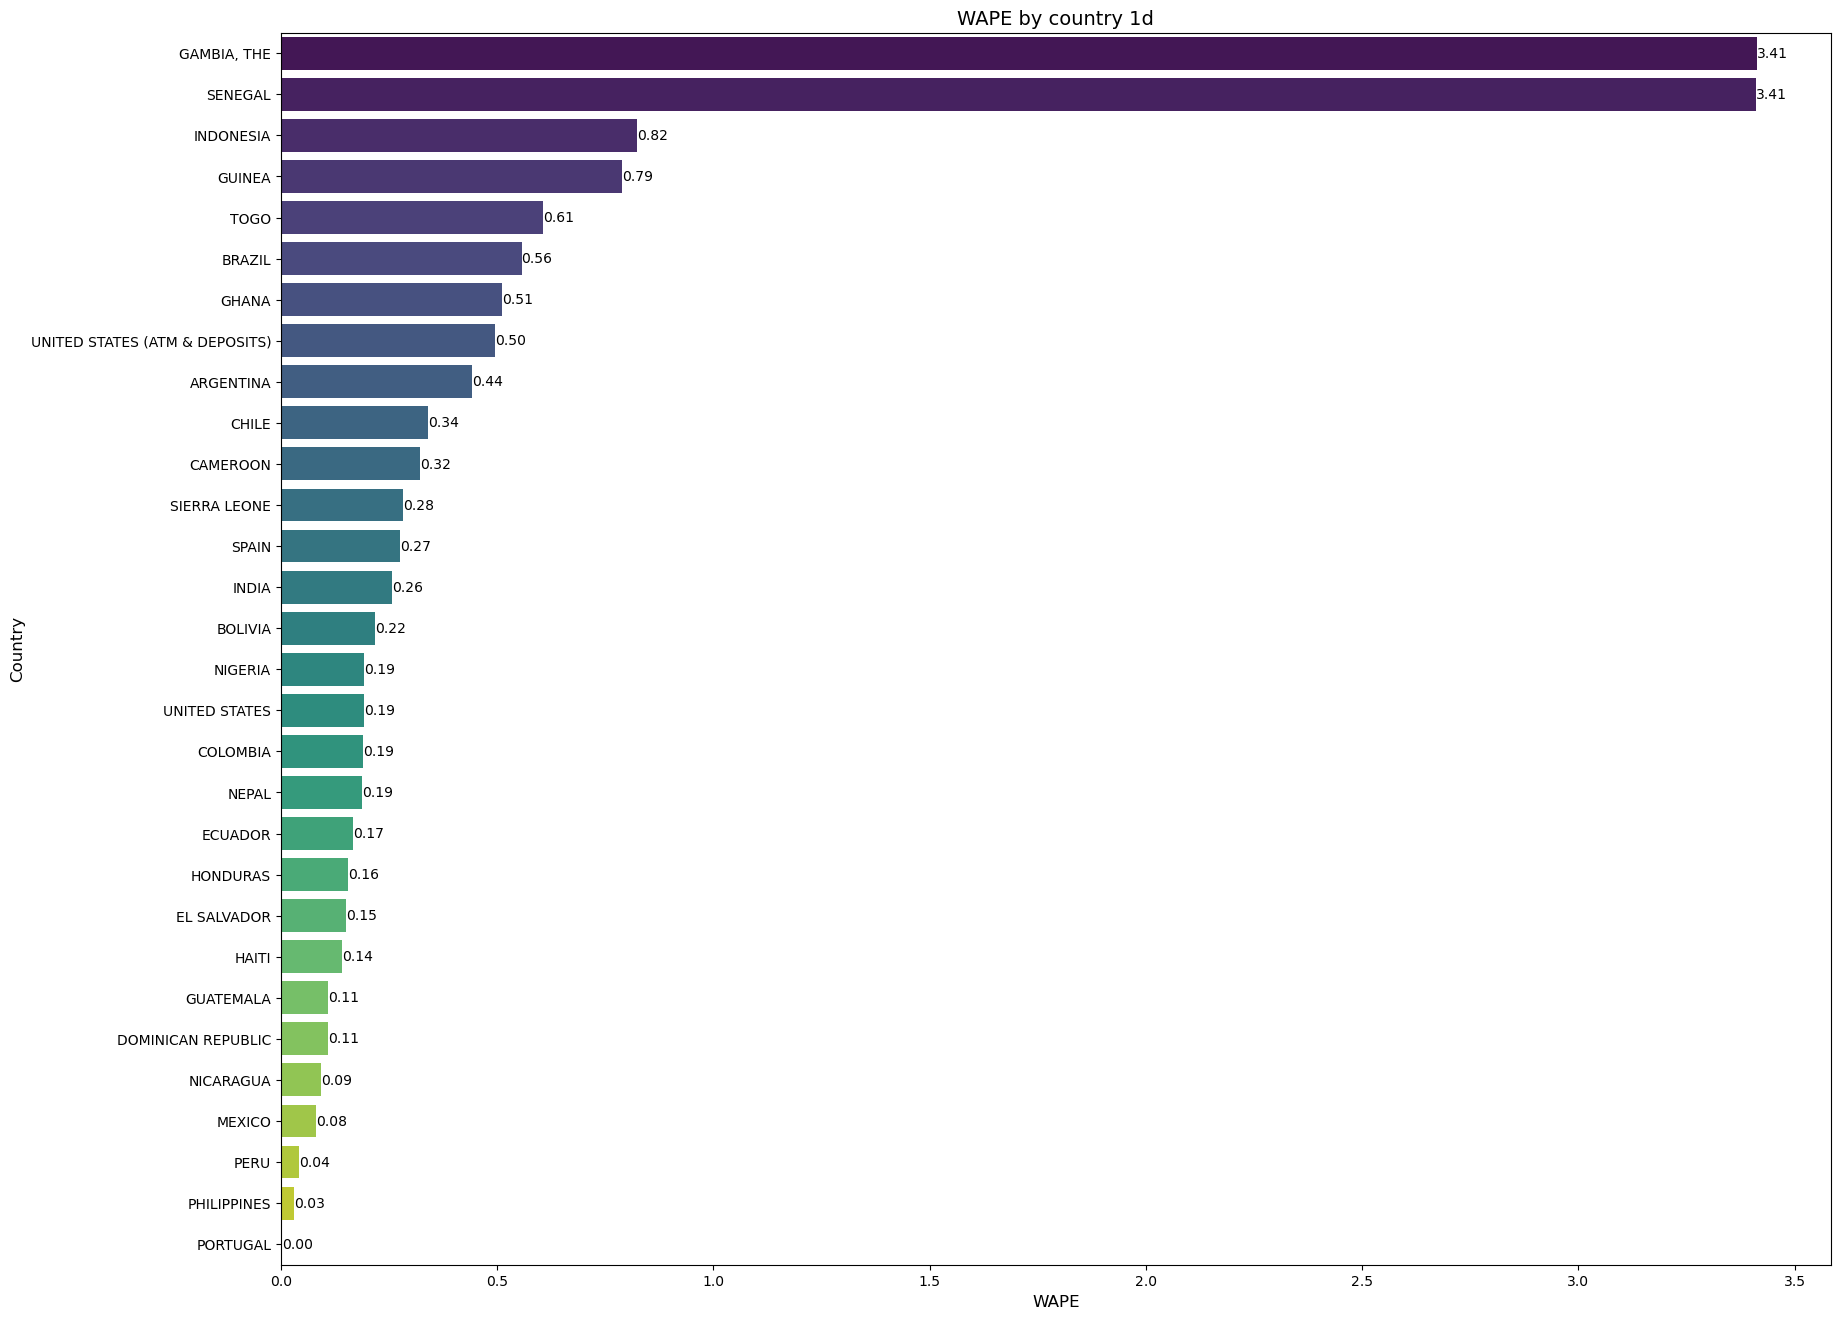

In [408]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [410]:
##MAPE A 3 DIAS##
###MAPE FORECAST A 3 DÍAS##
forecast_3d=df_forecast_final.loc[df_forecast_final.date<='2023-05-08']

In [411]:
forecast_3d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
91,ELEKTRA (MEXICO),MEXICO,2023-05-07,11452804.39,7.648060e+06,9.015764e+06,1.038347e+07,9.015764e+06,ELEKTRA (MEXICO)_MEXICO
87,ELEKTRA (MEXICO),MEXICO,2023-05-06,11403912.32,8.741092e+06,1.026435e+07,1.178762e+07,1.026435e+07,ELEKTRA (MEXICO)_MEXICO
384,ELEKTRA (MEXICO),MEXICO,2023-05-08,10623227.84,6.572627e+06,7.777625e+06,8.982623e+06,7.777625e+06,ELEKTRA (MEXICO)_MEXICO
41,BANRURAL (RYT),GUATEMALA,2023-05-07,7587373.43,5.192705e+06,6.190012e+06,7.187319e+06,6.190012e+06,BANRURAL (RYT)_GUATEMALA
232,BANCOPPEL (APPRIZA),MEXICO,2023-05-06,6872393.84,5.797374e+06,6.361396e+06,6.925417e+06,6.361396e+06,BANCOPPEL (APPRIZA)_MEXICO
469,BANCOPPEL (APPRIZA),MEXICO,2023-05-07,6844458.31,5.049953e+06,5.643870e+06,6.237787e+06,5.643870e+06,BANCOPPEL (APPRIZA)_MEXICO
446,BANCOPPEL (APPRIZA),MEXICO,2023-05-08,6019191.77,3.912859e+06,4.535238e+06,5.157617e+06,4.535238e+06,BANCOPPEL (APPRIZA)_MEXICO
705,BANRURAL (RYT),GUATEMALA,2023-05-06,5805138.88,4.401653e+06,5.226229e+06,6.050806e+06,5.226229e+06,BANRURAL (RYT)_GUATEMALA
98,BANCO INDUSTRIAL,GUATEMALA,2023-05-07,5676265.12,3.787777e+06,4.511562e+06,5.235348e+06,4.511562e+06,BANCO INDUSTRIAL_GUATEMALA
49,BANRURAL (RYT),GUATEMALA,2023-05-08,5384882.87,3.473970e+06,4.157400e+06,4.840829e+06,4.157400e+06,BANRURAL (RYT)_GUATEMALA


In [412]:
forecast_3d.date.min(),forecast_3d.date.max()

(Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-08 00:00:00'))

In [413]:
##MAPE PROMEDIO A 3 D (para los que tienen MAPE definido)
forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)
forecast_3d.pe.mean()

/tmp/ipykernel_738/383919511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)


0.4457951411763975

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


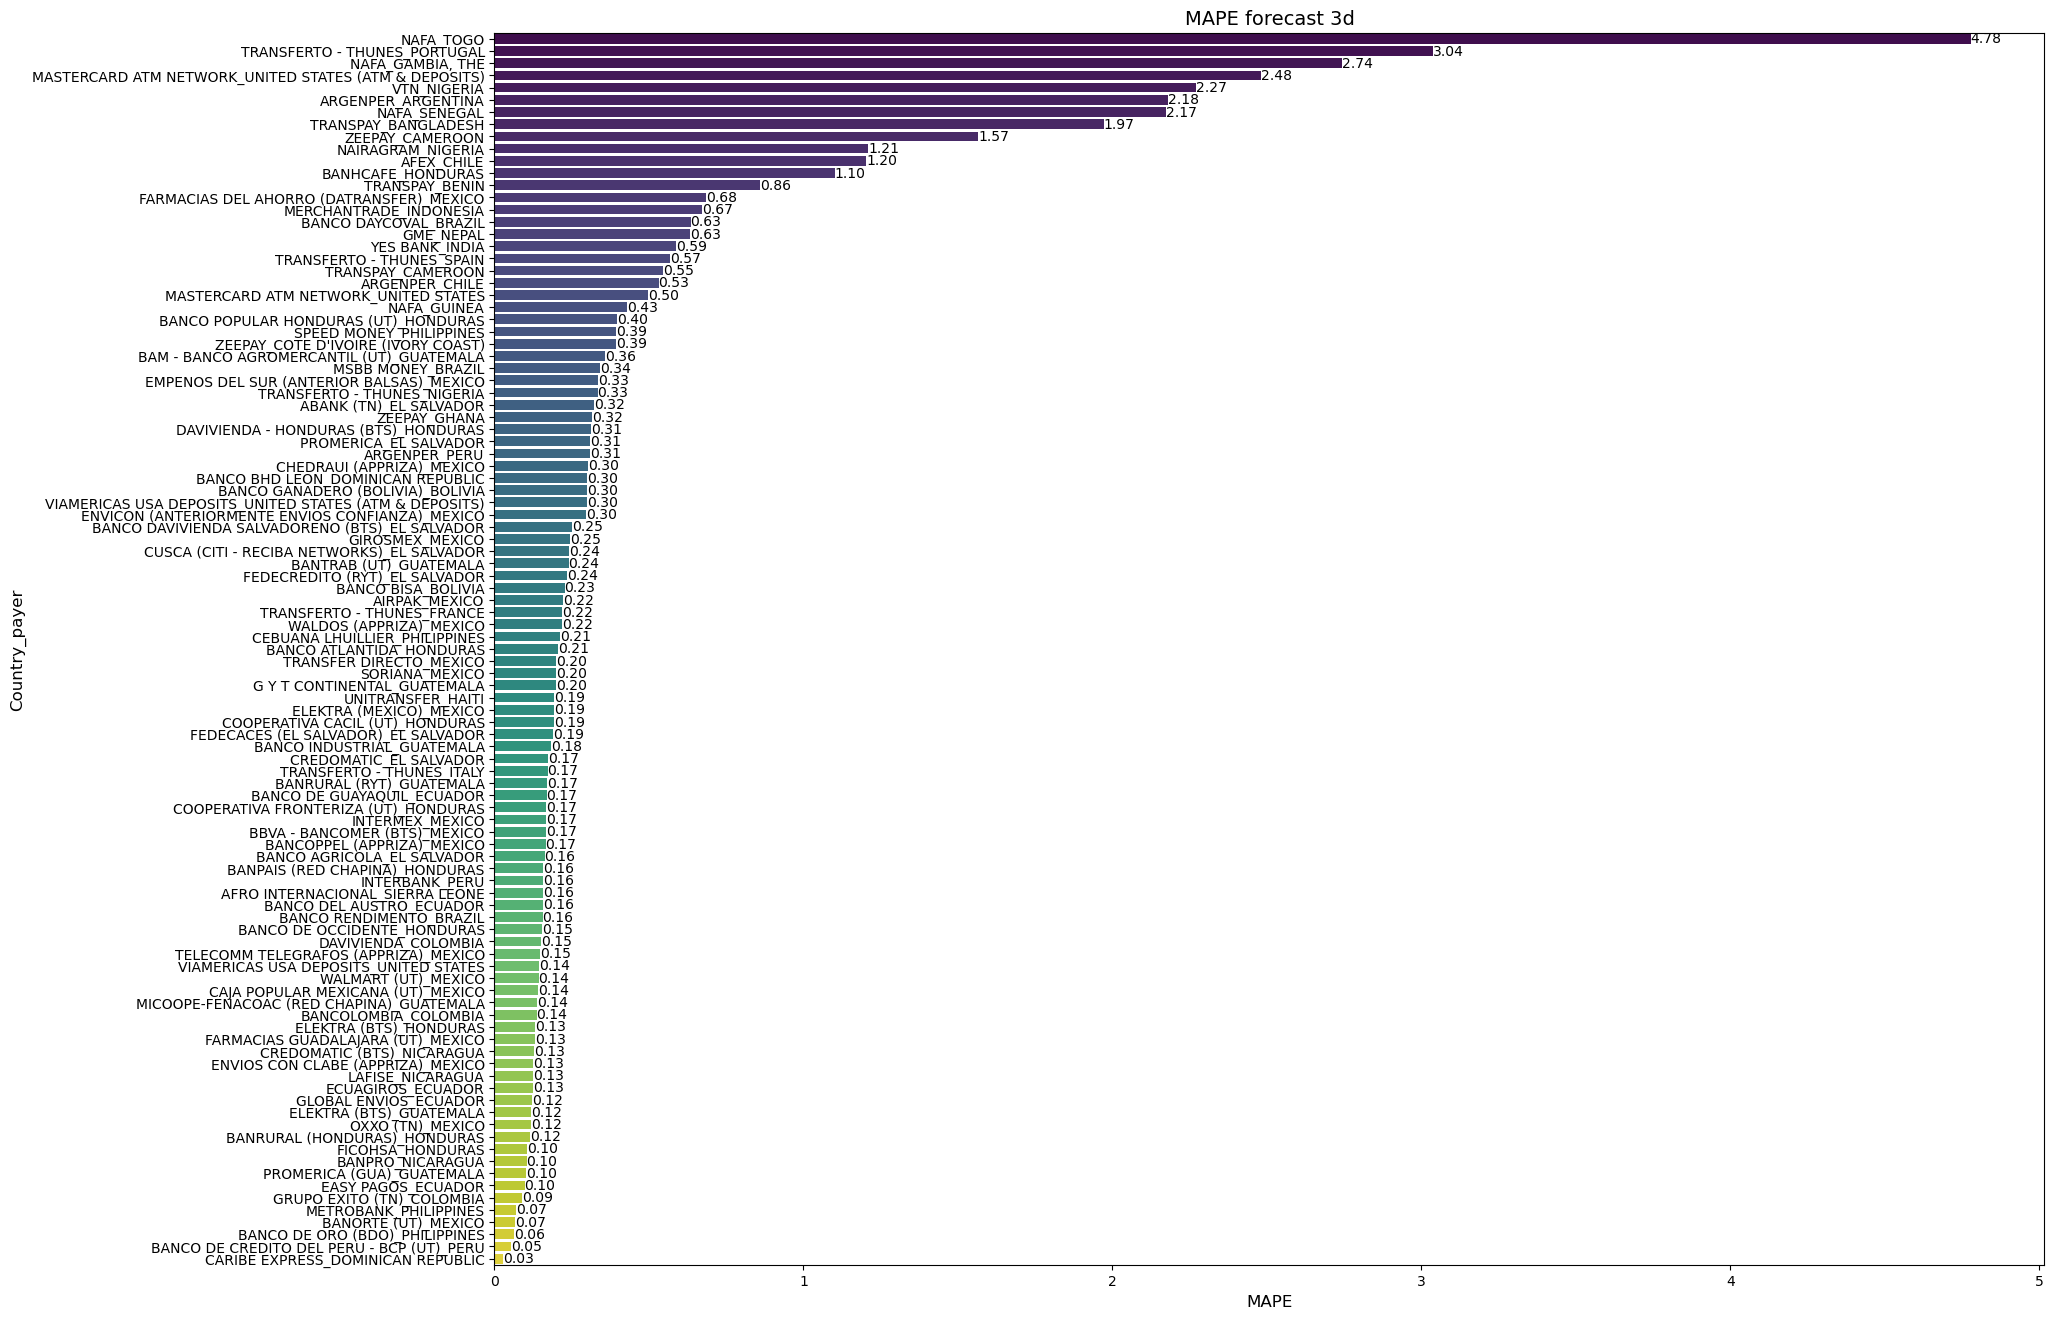

In [414]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_3d_payer_country = forecast_3d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_3d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [415]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


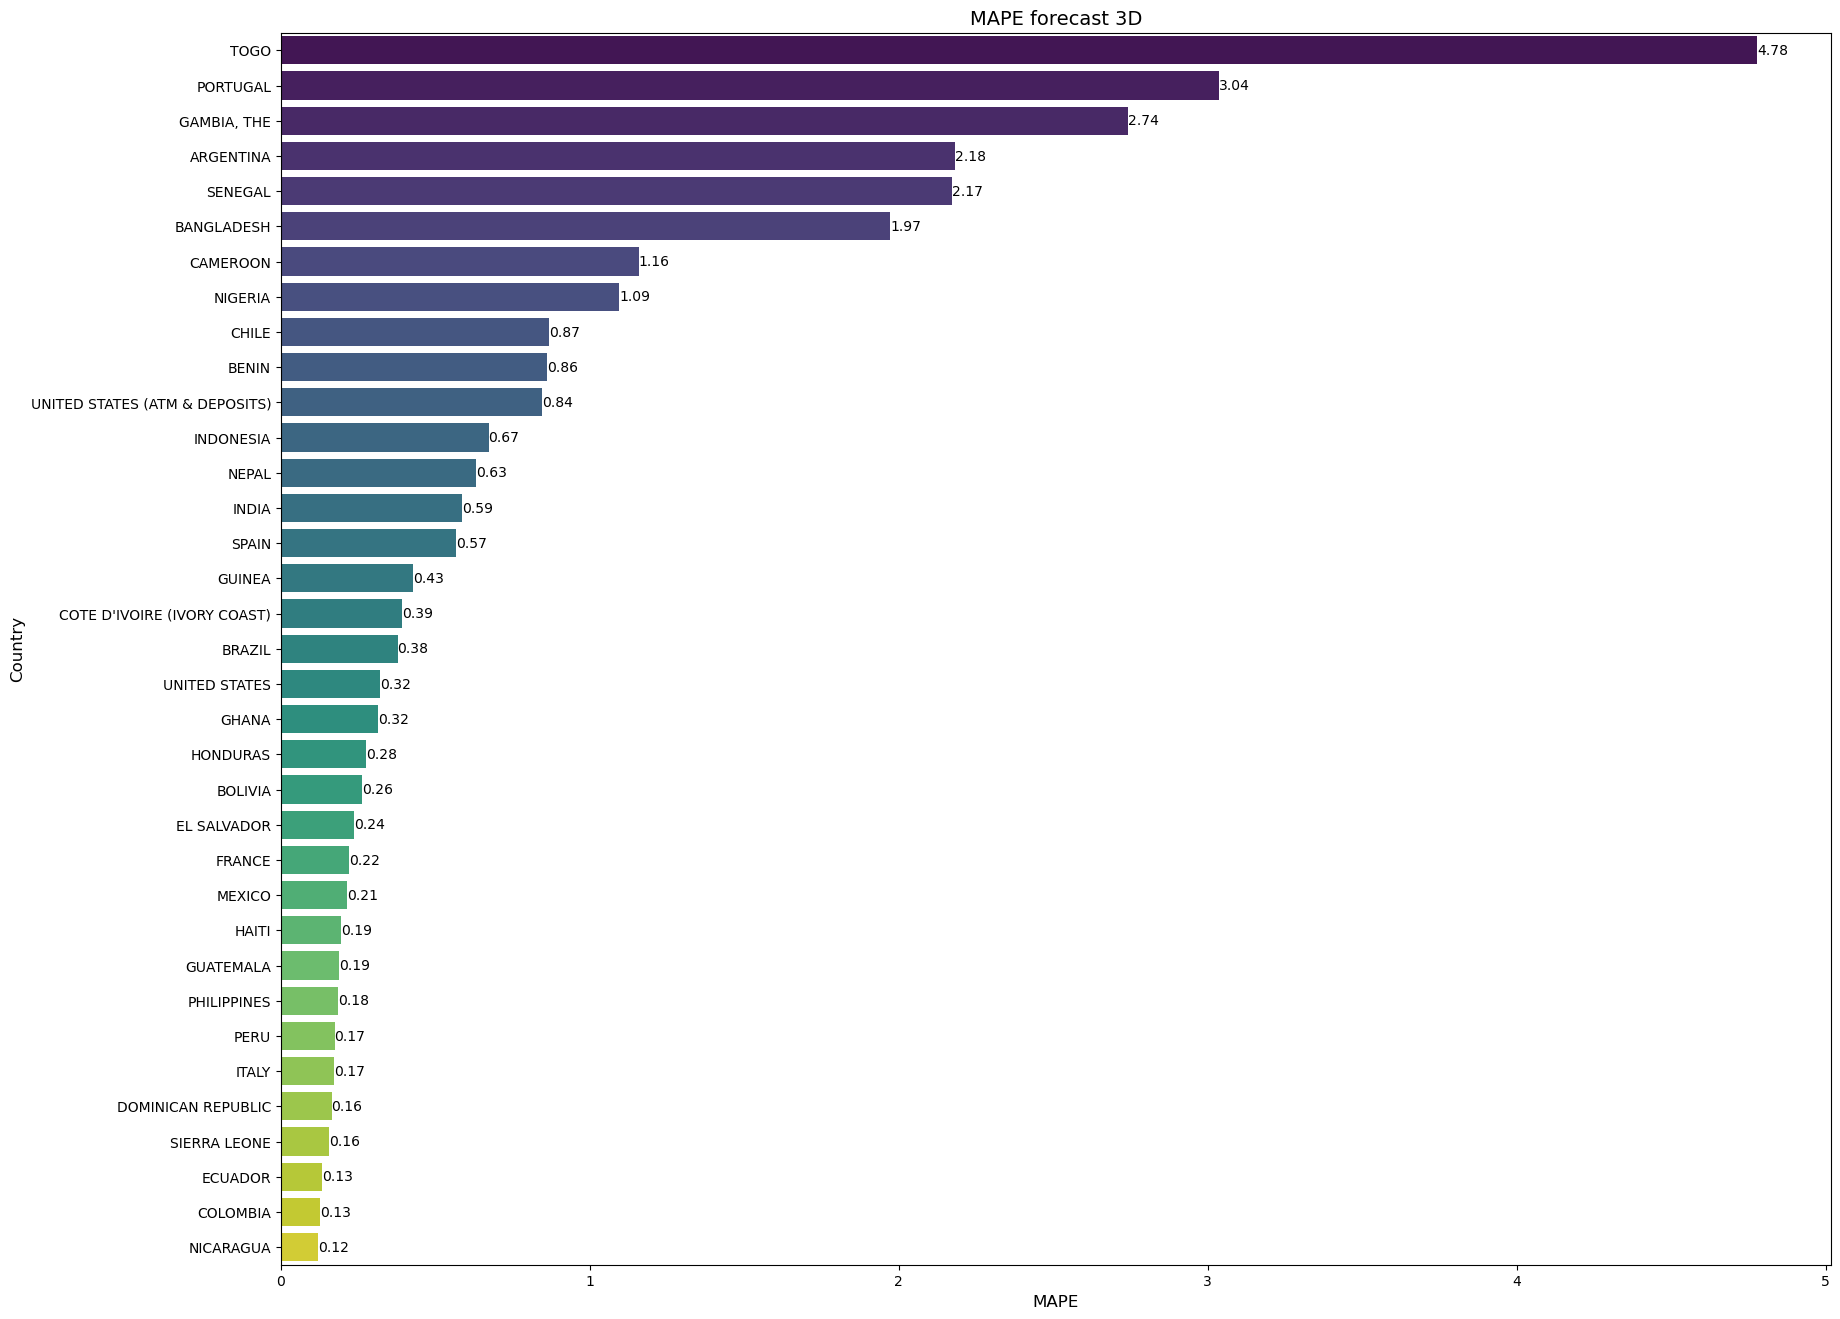

In [416]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [417]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.17359292679188676


/tmp/ipykernel_738/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [ ]:
##WAPE POR PAÍSES 3d##

In [418]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


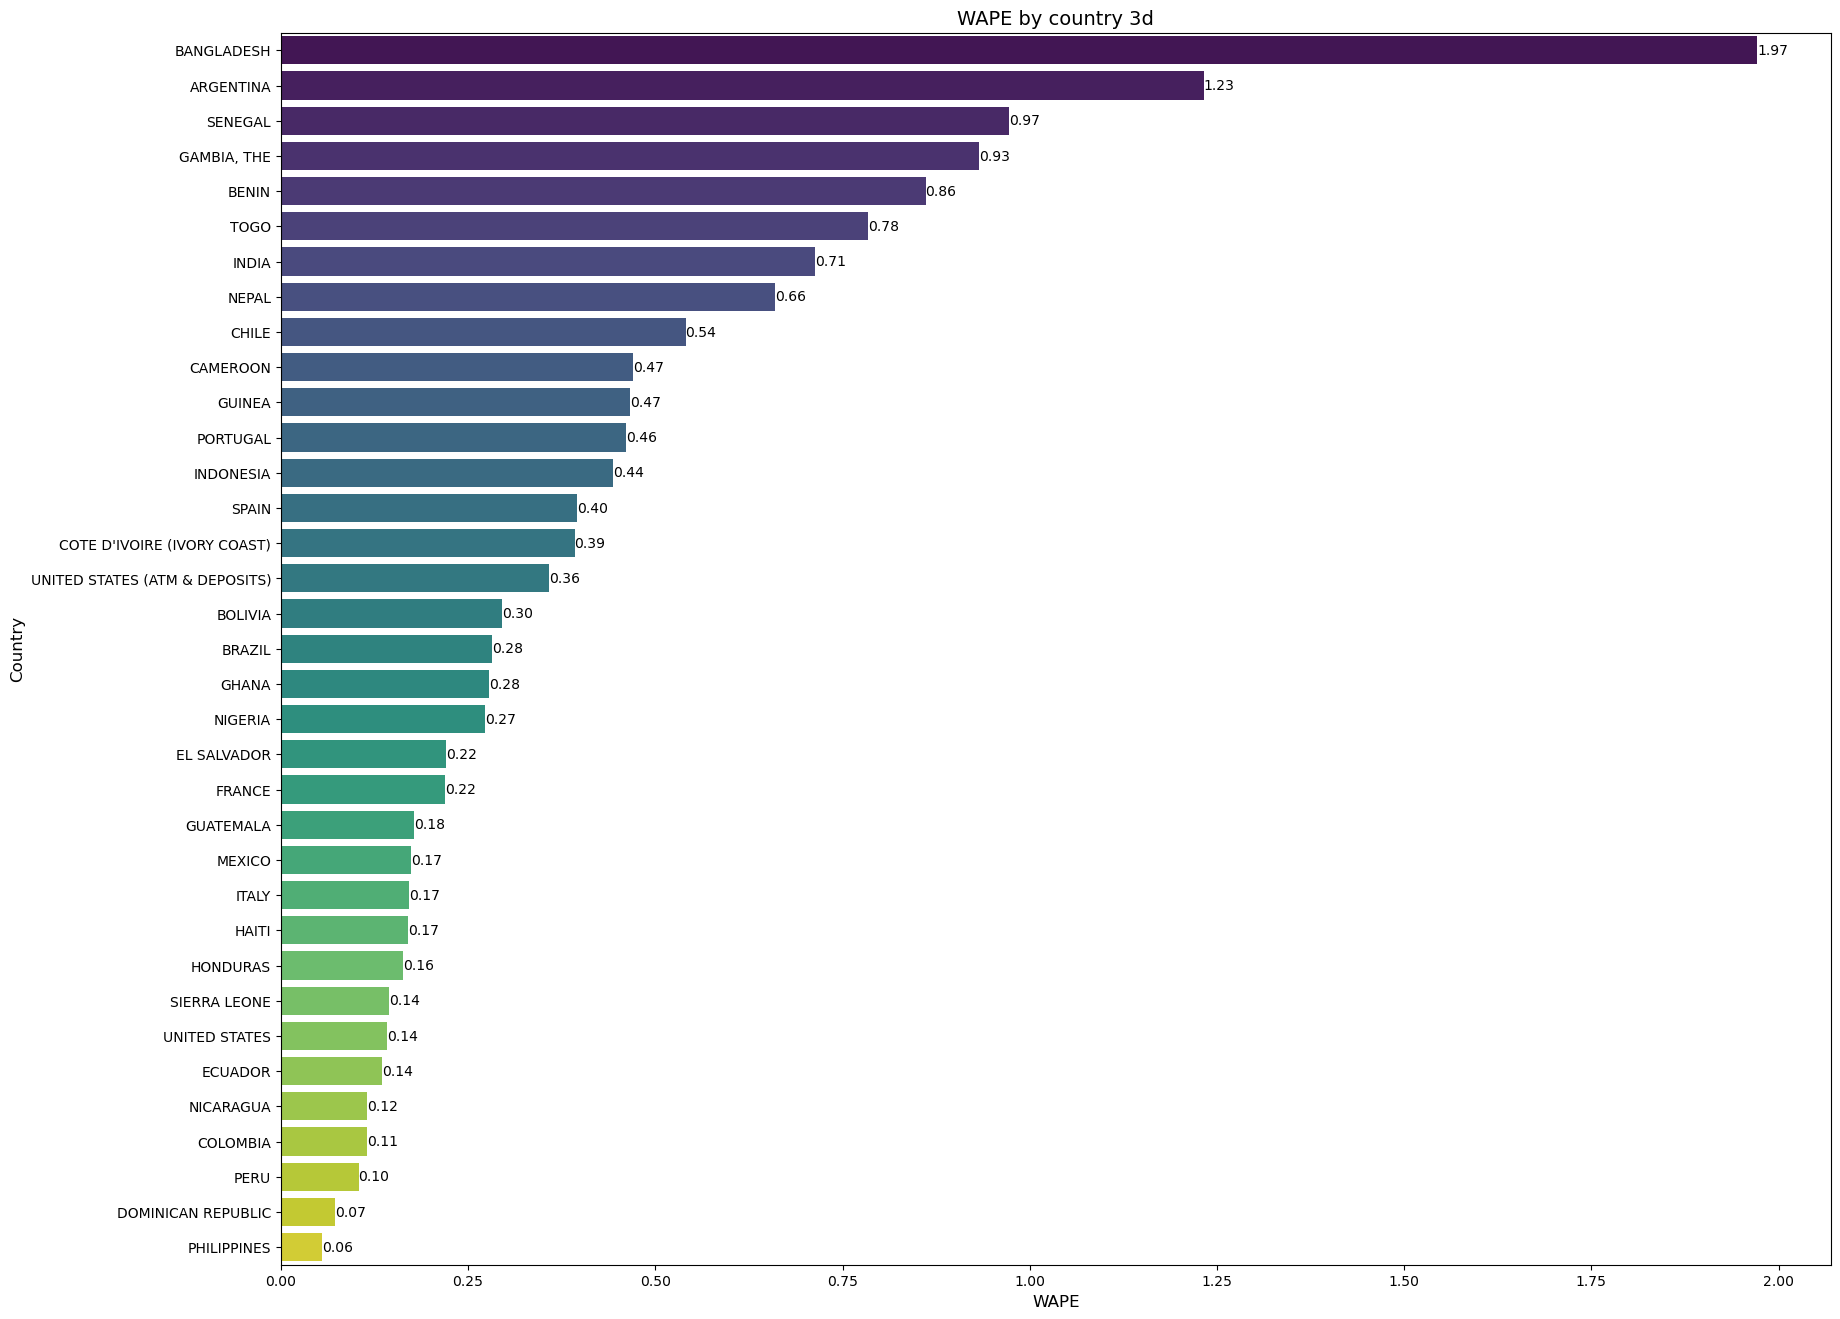

In [419]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [420]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [421]:
forecast_7d.shape

(668, 9)

In [422]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [423]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-12 00:00:00'))

In [424]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.4480527871036229

In [ ]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


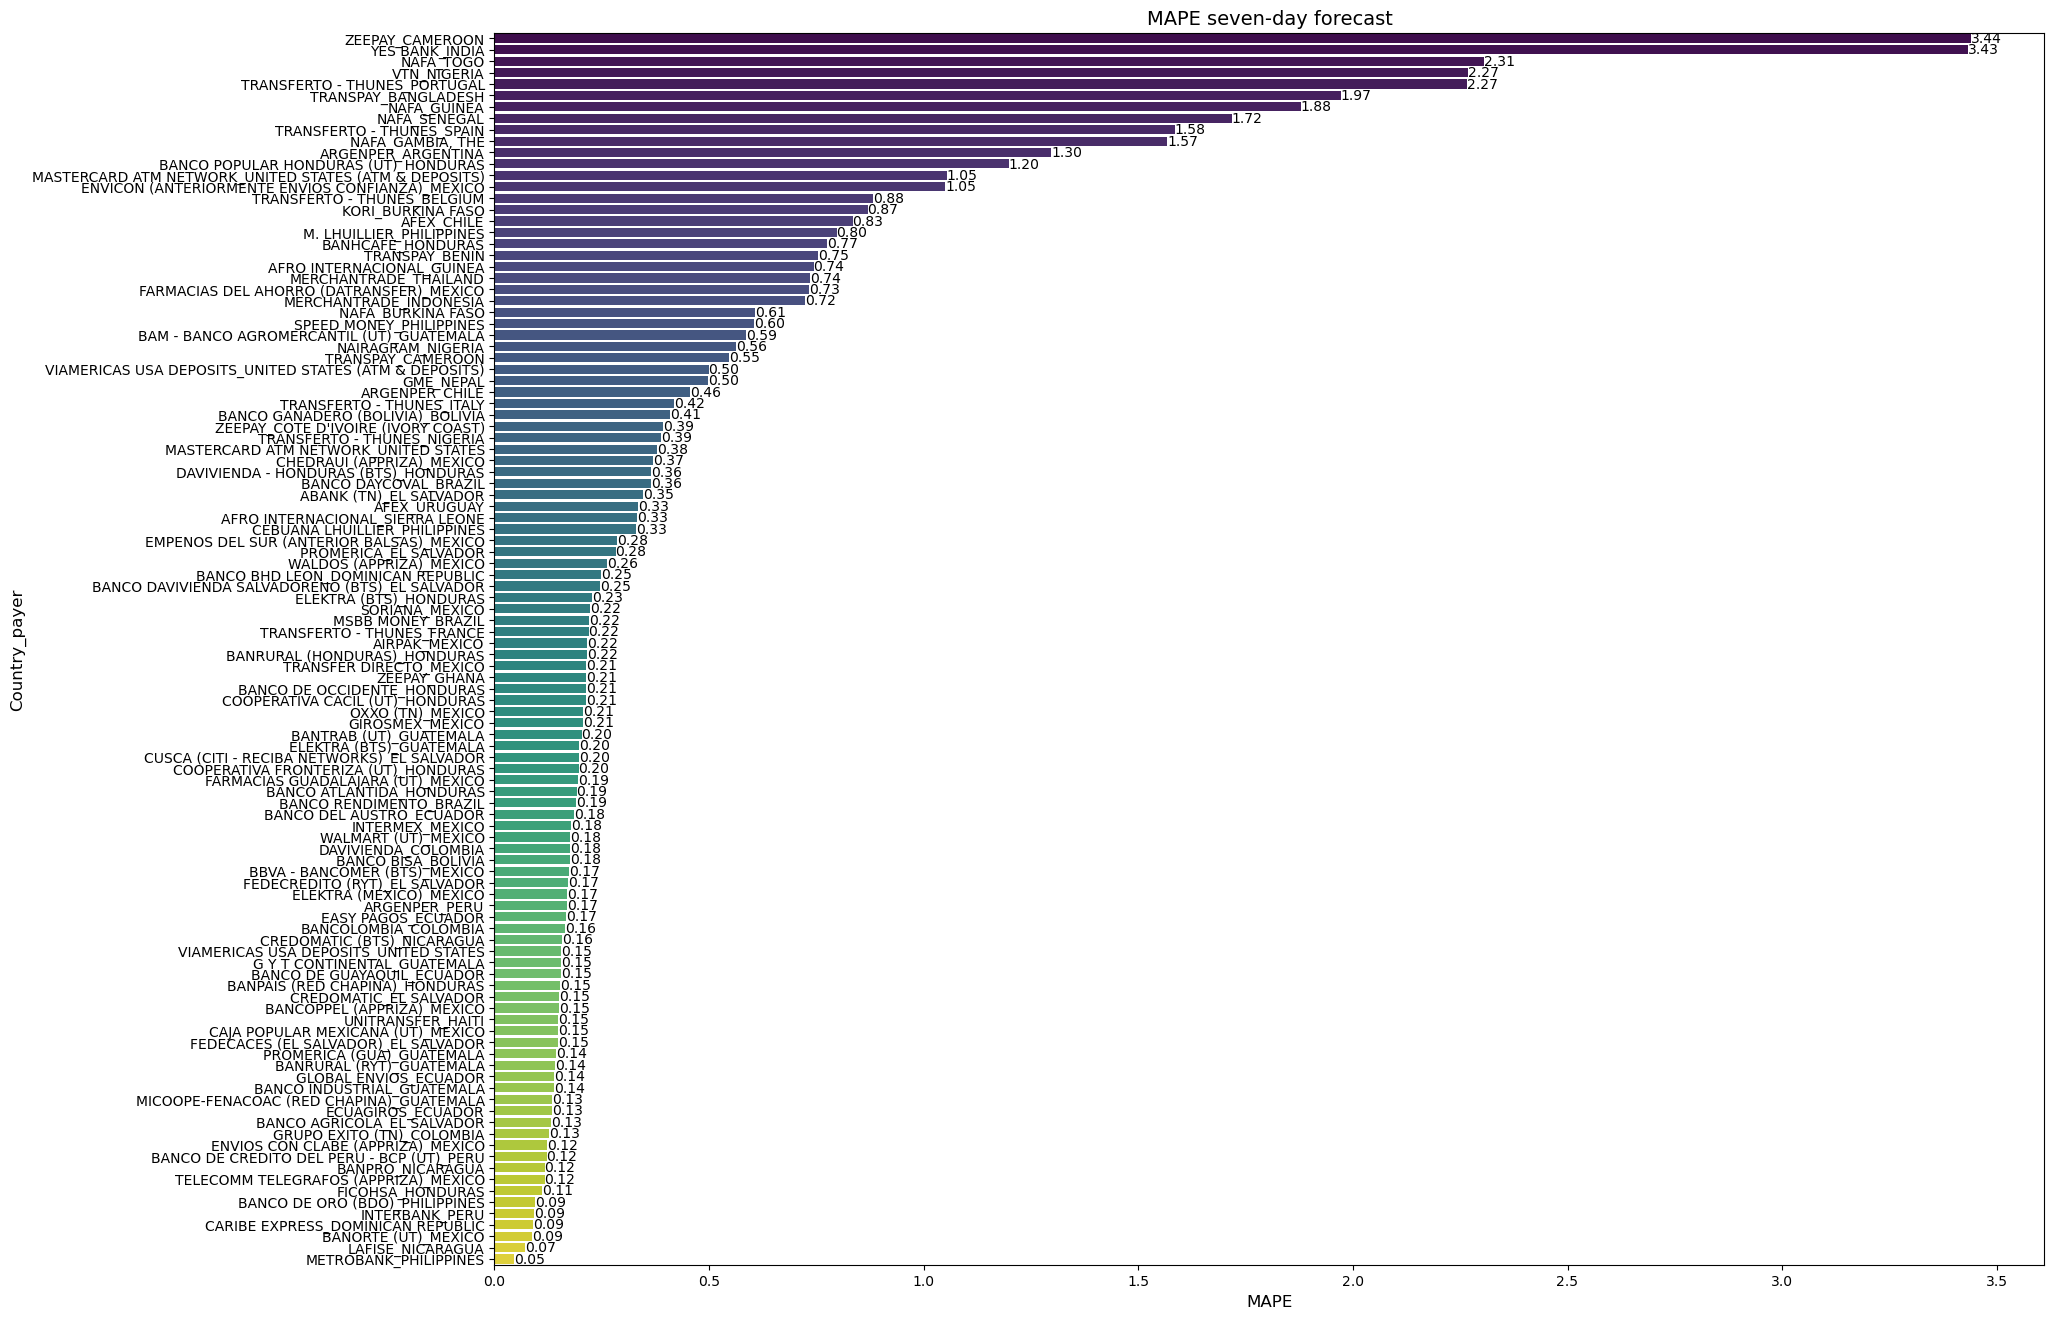

In [425]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [426]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


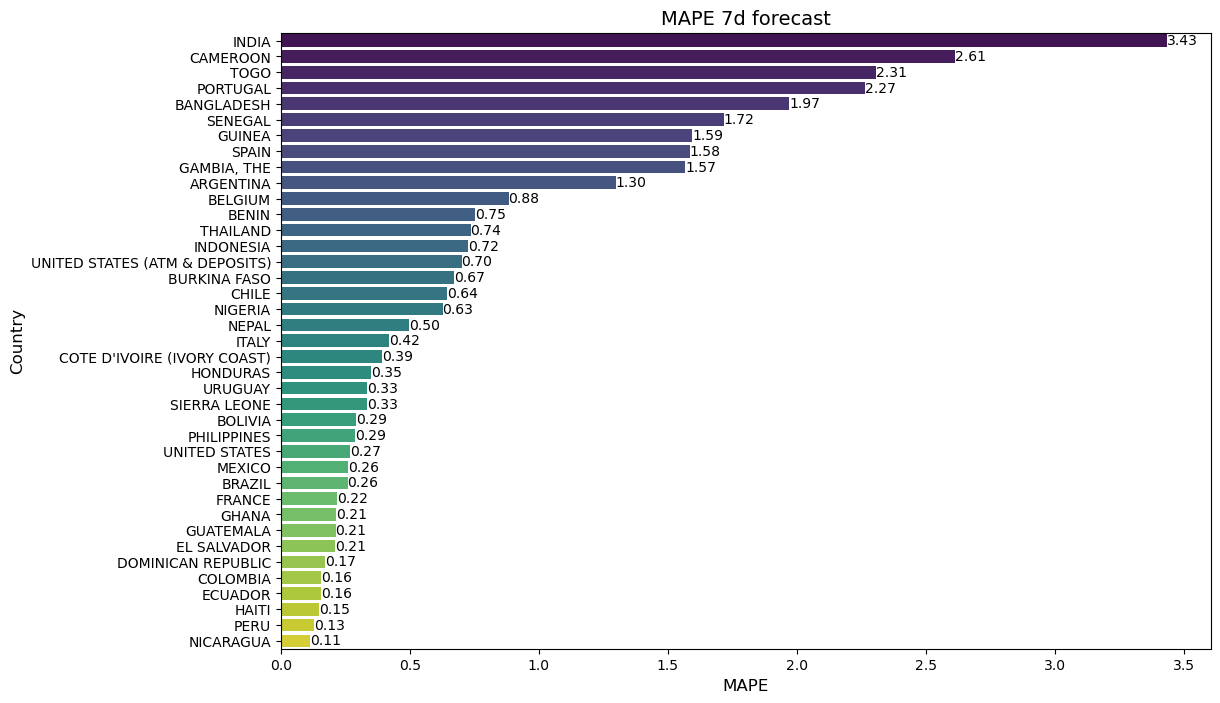

In [427]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [428]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.16463103876719068


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [429]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


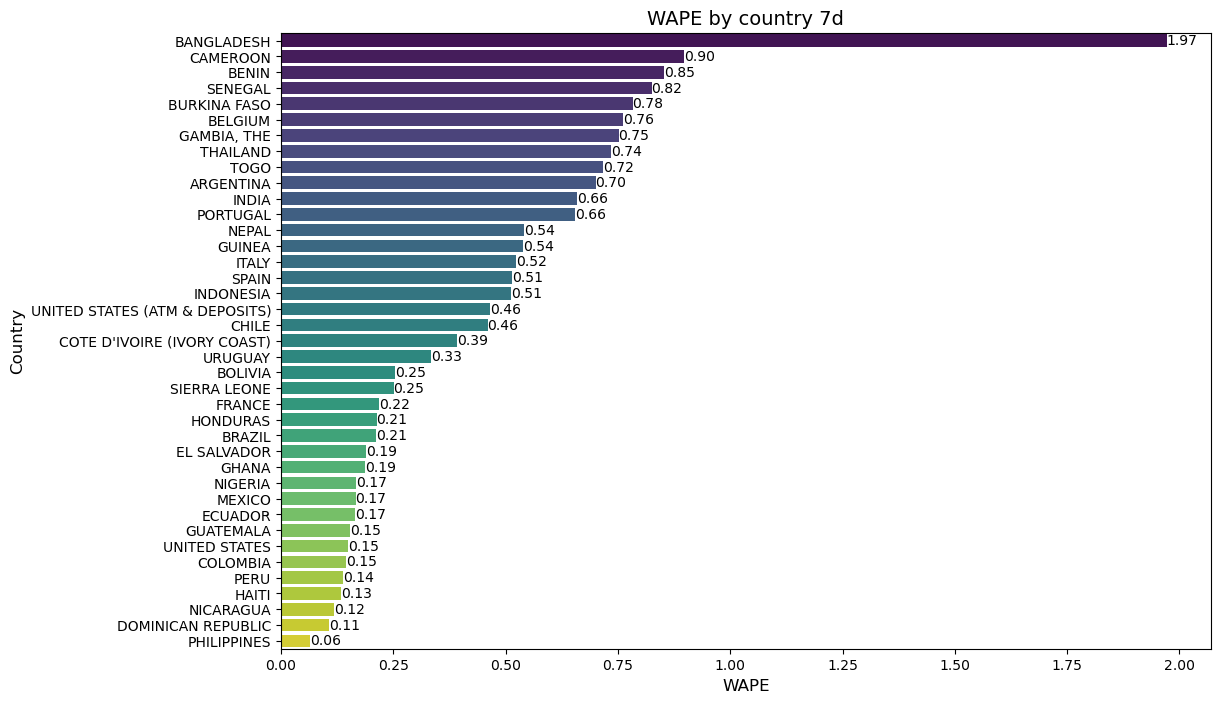

In [430]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
